In [21]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

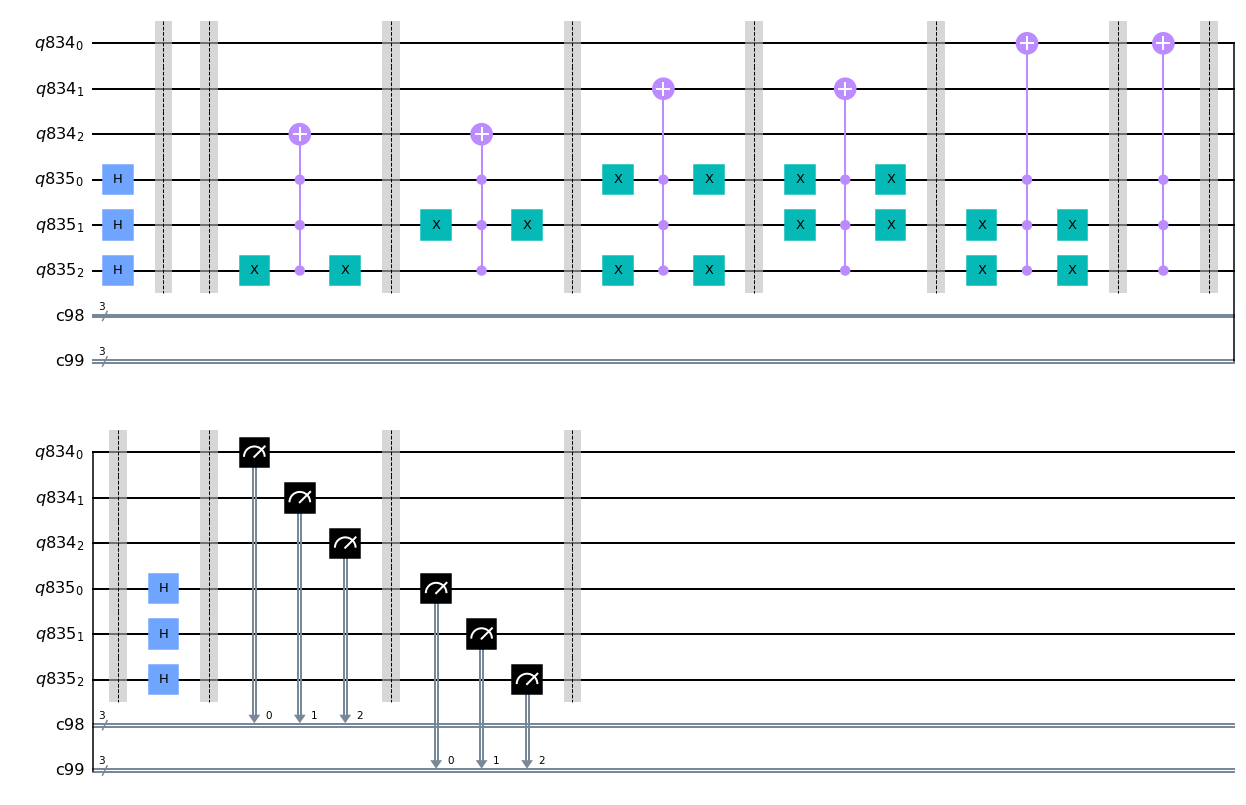

In [94]:
#Exemplo
Q1 = QuantumRegister(3)
Q2 = QuantumRegister(3)
C1 = ClassicalRegister(3)
C2 = ClassicalRegister(3)
circuito = QuantumCircuit(Q1, Q2, C1, C2)

circuito.h(Q2)
circuito.barrier()
circuito.barrier()

circuito.x(Q2[2])
circuito.mct(Q2, Q1[2], mode='advanced')
circuito.x(Q2[2])
circuito.barrier()

circuito.x(Q2[1])
circuito.mct(Q2, Q1[2], mode='advanced')
circuito.x(Q2[1])
circuito.barrier()

circuito.x(Q2[0])
circuito.x(Q2[2])
circuito.mct(Q2, Q1[1], mode='advanced')
circuito.x(Q2[0])
circuito.x(Q2[2])
circuito.barrier()

circuito.x(Q2[0])
circuito.x(Q2[1])
circuito.mct(Q2, Q1[1], mode='advanced')
circuito.x(Q2[0])
circuito.x(Q2[1])
circuito.barrier()

circuito.x(Q2[1])
circuito.x(Q2[2])
circuito.mct(Q2, Q1[0], mode='advanced')
circuito.x(Q2[1])
circuito.x(Q2[2])
circuito.barrier()

circuito.mct(Q2, Q1[0], mode='advanced')
circuito.barrier()

circuito.barrier()

circuito.h(Q2)
circuito.barrier()

circuito.measure(Q1, C1)
circuito.barrier()

circuito.measure(Q2, C2)
circuito.barrier()

circuito.draw(output='mpl')

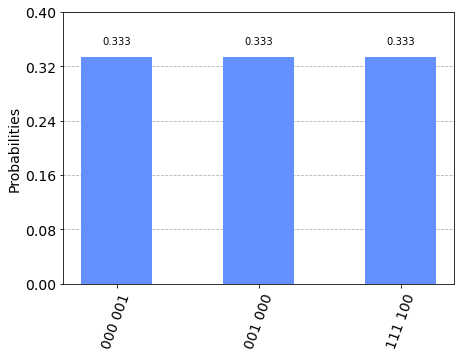

In [98]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=3)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)